# Validate python replacement of MTR Calibration Coefficient Equations

An excel file with macros has been the goto tool for years (developed by Sharon Walker in 199x's - so its 20-25 years old). It still works acurately but the general workflow (keeping every calibration within a single excel file (600mb) and relying on old VB code) has made for a bloated and hard to interpret resource.

Ideal solution is to break out the actual calibration values into an independent Excel/Google Sheet and then simplify the routines for calculating the coefficients so as to not be as resource dependent and to be more collaborative.

This tool relys on:
- EcoFOCIpy package to read the raw MTR data
- JupyterLab or other Notebook approach with python to calculate Coefficients

## EcoFOCIpy Processing

skip most of the discussion that is usually associated with processing data and just process MT3276,MT4016 with excel (old) and python (new) methodologies 

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import yaml

import EcoFOCIpy.io.mtr_parser as mtr_parser #<- instrument specific
import EcoFOCIpy.io.ncCFsave as ncCFsave
import EcoFOCIpy.metaconfig.load_config as load_config

The sample_data_dir should be included in the github package but may not be included in the pip install of the package

## Simple Processing - first step

In [19]:
sample_data_dir = '/Users/bell/Programs/EcoFOCIpy/'
user_data_dir = '/Users/bell/ecoraid/2018/Moorings/18bs4b/'

In [20]:
###############################################################
# edit to point to {instrument sepcific} raw datafile 
datafile = user_data_dir+'raw/mtr/3276.TXT'
instrument = 'MTR 3276'
mooring_meta_file = user_data_dir+'logs/18BS-4B.yaml'
inst_meta_file = sample_data_dir+'staticdata/instr_metaconfig/mtr_cf.yaml'
institution_meta_file = sample_data_dir+'staticdata/institutional_meta_example.yaml' #include uaf?
inst_shortname = 'mt'

#
mtr_coef = [1.0228293948E-03,5.5731185258E-04,1.7542892155E-06] #1.0833176743E-03	5.3406572504E-04	2.1827074029E-06
time_offset_seconds = 0*60 + 0.001 #not known for this inst so make very small... or time_corr fails
###############################################################

#init and load data
mtr_wop = mtr_parser.mtr()
(mtr_wop_data,mtr_wop_header) = mtr_wop.parse(filename=datafile,
                                                    return_header=True,
                                                    datetime_index=True,
                                                    version=4.1) 

mtr_wop_data = mtr_wop.hex2dec(mtr_wop_data)

#10min batches represent a two hour grouping, 10 groupings for a 20hour window
mtr_wop_data = mtr_wop.res2temp(mtr_wop_data,mtr_coef)

mtr_wop_df = mtr_wop.dic2df(mtr_wop_data)

In [21]:
###############################################################

mtr_coef = [1.0222162356E-03,5.5752067428E-04,1.7506986769E-06] #1.0833176743E-03	5.3406572504E-04	2.1827074029E-06
time_offset_seconds = 0*60 + 0.001 #not known for this inst so make very small... or time_corr fails
###############################################################

#init and load data
mtr_wop = mtr_parser.mtr()
(mtr_wop_data,mtr_wop_header) = mtr_wop.parse(filename=datafile,
                                                    return_header=True,
                                                    datetime_index=True,
                                                    version=4.1) 

mtr_wop_data = mtr_wop.hex2dec(mtr_wop_data)

#10min batches represent a two hour grouping, 10 groupings for a 20hour window
mtr_wop_data = mtr_wop.res2temp(mtr_wop_data,mtr_coef)

mtr_wop_df_new = mtr_wop.dic2df(mtr_wop_data)

## Plots of overlapping timeseries and differences

<Axes: xlabel='date_time'>

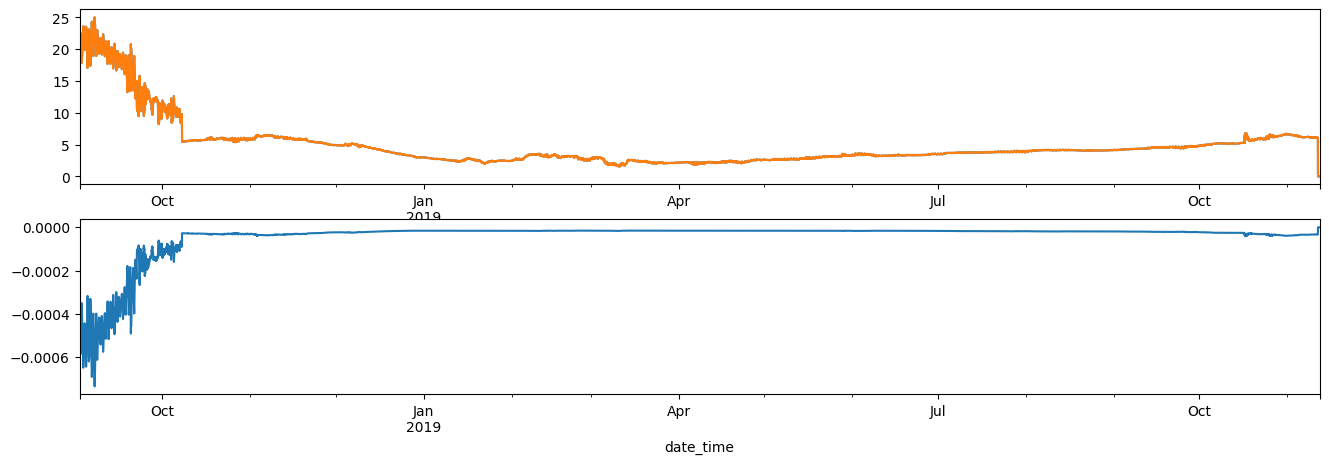

In [23]:
fig, ax = plt.subplots(2,figsize=(16, 5))
mtr_wop_df.temperature.plot(ax=ax[0])
mtr_wop_df_new.temperature.plot(ax=ax[0])

(mtr_wop_df.temperature - mtr_wop_df_new.temperature).plot(ax=ax[1])

### MTR 4016

In [31]:
sample_data_dir = '/Users/bell/Programs/EcoFOCIpy/'
user_data_dir = '/Users/bell/ecoraid/2018/Moorings/18ckv2a/'

In [32]:
###############################################################
# edit to point to {instrument sepcific} raw datafile 
datafile = user_data_dir+'raw/mtr/4019.TXT'
instrument = 'MTR 4019'
mooring_meta_file = user_data_dir+'logs/18CKV-2A.yaml'
inst_meta_file = sample_data_dir+'staticdata/instr_metaconfig/mtr_cf.yaml'
institution_meta_file = sample_data_dir+'staticdata/institutional_meta_example.yaml' #include uaf?
inst_shortname = 'mt'

#
mtr_coef = [1.1323194904E-03,5.1829780451E-04,2.4294337863E-06] #1.0833176743E-03	5.3406572504E-04	2.1827074029E-06
time_offset_seconds = 0*60 + 0.001 #not known for this inst so make very small... or time_corr fails
###############################################################

#init and load data
mtr_wop = mtr_parser.mtr()
(mtr_wop_data,mtr_wop_header) = mtr_wop.parse(filename=datafile,
                                                    return_header=True,
                                                    datetime_index=True,
                                                    version=4.0) 

mtr_wop_data = mtr_wop.hex2dec(mtr_wop_data)

#10min batches represent a two hour grouping, 10 groupings for a 20hour window
mtr_wop_data = mtr_wop.res2temp(mtr_wop_data,mtr_coef)

mtr_wop_df = mtr_wop.dic2df(mtr_wop_data)

In [33]:
###############################################################

mtr_coef = [1.1316873213E-03,5.1851278015E-04,2.4257485866E-06] #1.0833176743E-03	5.3406572504E-04	2.1827074029E-06
time_offset_seconds = 0*60 + 0.001 #not known for this inst so make very small... or time_corr fails
###############################################################

#init and load data
mtr_wop = mtr_parser.mtr()
(mtr_wop_data,mtr_wop_header) = mtr_wop.parse(filename=datafile,
                                                    return_header=True,
                                                    datetime_index=True,
                                                    version=4.1) 

mtr_wop_data = mtr_wop.hex2dec(mtr_wop_data)

#10min batches represent a two hour grouping, 10 groupings for a 20hour window
mtr_wop_data = mtr_wop.res2temp(mtr_wop_data,mtr_coef)

mtr_wop_df_new = mtr_wop.dic2df(mtr_wop_data)

In [34]:
## Plots of overlapping timeseries and differences

<Axes: xlabel='date_time'>

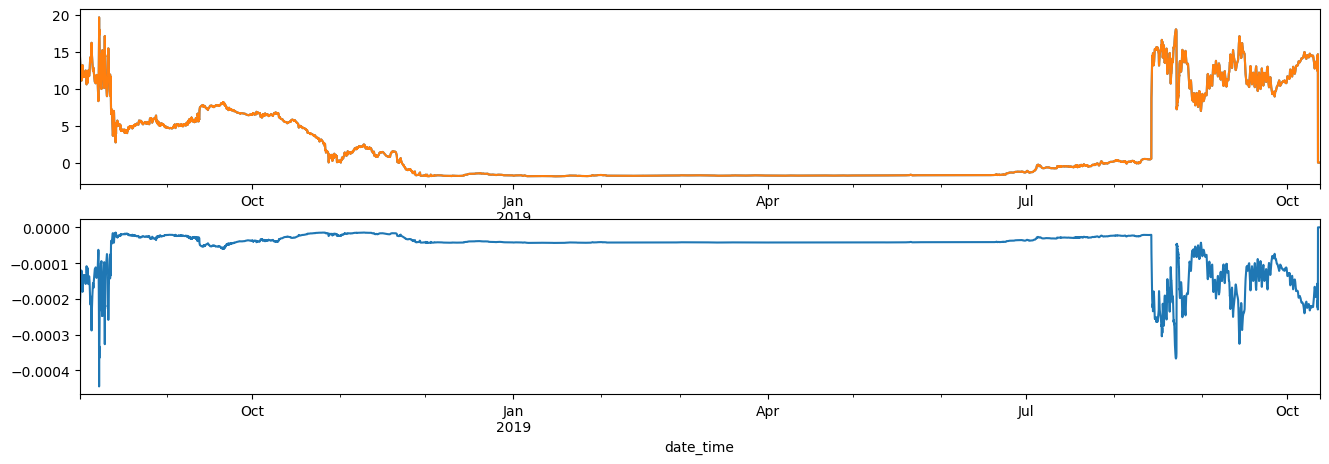

In [35]:
fig, ax = plt.subplots(2,figsize=(16, 5))
mtr_wop_df.temperature.plot(ax=ax[0])
mtr_wop_df_new.temperature.plot(ax=ax[0])

(mtr_wop_df.temperature - mtr_wop_df_new.temperature).plot(ax=ax[1])

## Discussion

One can see from both plots above, and the coefficients, that the python method is not identical to the excel method.  It is presumed this is due to computation precision and how floating point values are being represented.  It could also be represented by small differences in the "time window" chosed to calculate the coefficients from.  This results in discrepencies on the order of 0.1%.

The difference plots shown above have the calculated temperatures being with 0.0001 during the period of deployment with a little more noise (order of magintude) for periods outside of the deployment.  Coincidentally, these are also periods that are outside of the dynamically calibrated range of the instruments (-2:8) and so slight deviations in coefficients are expected to have more impact in these cases.